In [174]:
import pandas as pd
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
from plotly.graph_objects import * 
import warnings
from sklearn.metrics import mean_absolute_error, r2_score
warnings.filterwarnings('ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   

from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [175]:
df = pd.read_csv(r'...monthly-car-sales.csv')

In [176]:
df.head()

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


Создадим серию, у которой в качестве индекса будет Month, а в качестве значений - количество продаж Sales

<AxesSubplot:xlabel='Month'>

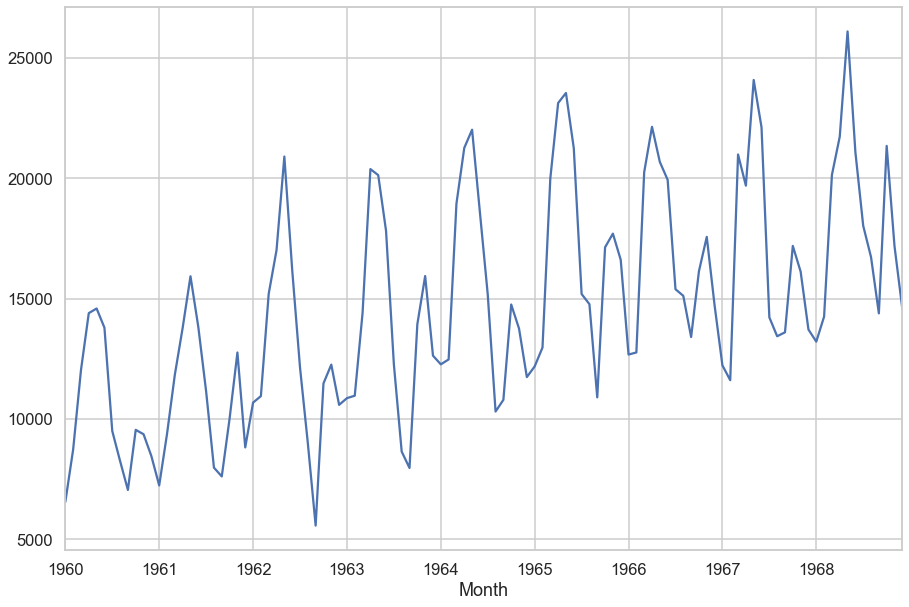

In [177]:
df['Month']=pd.to_datetime(df['Month'])
df.set_index('Month',inplace=True)
s = df['Sales']
s.index.freq = 'MS'
s.plot()

## Задание №1


Разделить данные на train и test, оставив на test два года

In [178]:
train, test = df[0:-24], df[-24:]

In [179]:
def plot(test_data, pred_data):
    trace1=Scatter(y=test_data.values.flatten(),
                  name='Original')
    trace2=Scatter(y=pred_data.values.flatten(),
                  name='Prediction')
    name=np.round(r2_score(test_data,pred_data),2)
    
    iplot(Figure(data=[trace1,trace2],
                 layout=Layout(title=name)))

## Задание №2

In [180]:
#Создать модель  SimpleExpSmoothing 
#Натренировать ее на train данных
#Сделать предсказания как для train, так и для test
#Выбрать метрики и посчитать качества предсказаний для train и для test
#Построить графики, на которых будут как реальные данные, так и предсказания

In [181]:
mod=SimpleExpSmoothing(train)
mod_fit=mod.fit(optimized=True)

pred_train=mod_fit.fittedvalues

In [182]:
plot(train,pred_train)

In [183]:
pred_test=mod_fit.forecast(len(test))
plot(test,pred_test)

### Задание №3

In [184]:
#Построить модели двойного и тройного экспоненциального сглаживания
#Так же, как и в предыдущем задании, посчитать метрики для train и test
#Построить график

In [185]:
mod=ExponentialSmoothing(train,
                        trend='add',
                        seasonal='add')
mod_fit=mod.fit(optimized=True)

pred_train=mod_fit.fittedvalues

plot(train,pred_train)

In [186]:
pred_test=mod_fit.forecast(len(test))
plot(test,pred_test)

In [187]:
mod=ExponentialSmoothing(train,
                        trend='mul',
                        seasonal='mul')
mod_fit=mod.fit(optimized=True)

pred_train=mod_fit.fittedvalues
pred_test=mod_fit.forecast(len(test))

plot(train,pred_train)
plot(test,pred_test)

Задание №4

Выбрать модель с наиболее подходящими параметрами среди предыдущих
Сделать цикл кросс-валидации, где размер test равен одному году
Посчитать среднее значение выбранных метрик

In [188]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model  import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import r2_score

# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(15, 10)})
sns.set(font_scale=2)
sns.set_style("whitegrid")
sns.set_context("talk")

test_size = 12
n_splits = 3 
size = len(df)

In [189]:
for i in reversed(range(n_splits)):
    idx = size - (i+1)*test_size
    train = df[0:idx]
    test = df[idx:idx+test_size]
    rest = df[idx+test_size:]
    print(len(train), len(test), len(rest))

72 12 24
84 12 12
96 12 0


In [190]:
order = (0,1,1)
seasonal_order = (2,1,0,12)

s = pd.Series(index=df.index,
             data = df['Sales'].values)

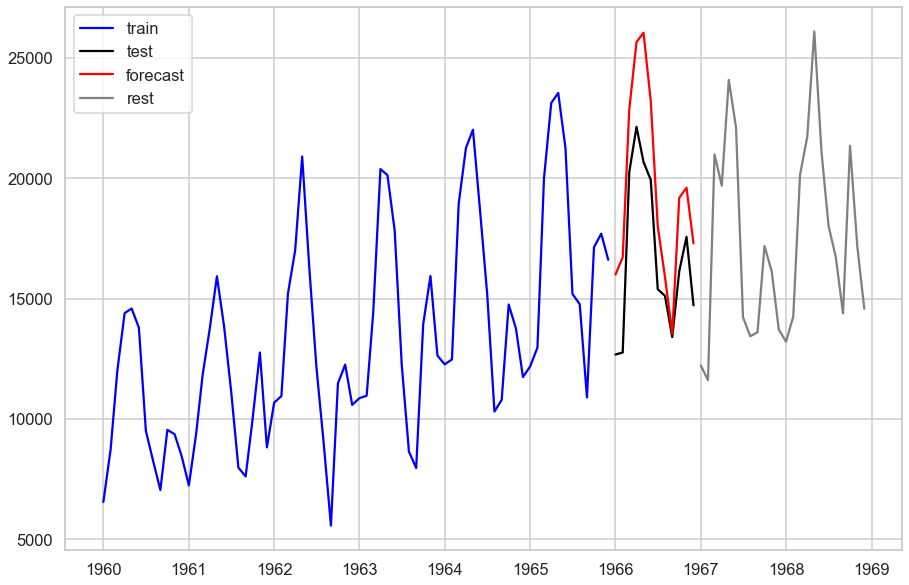

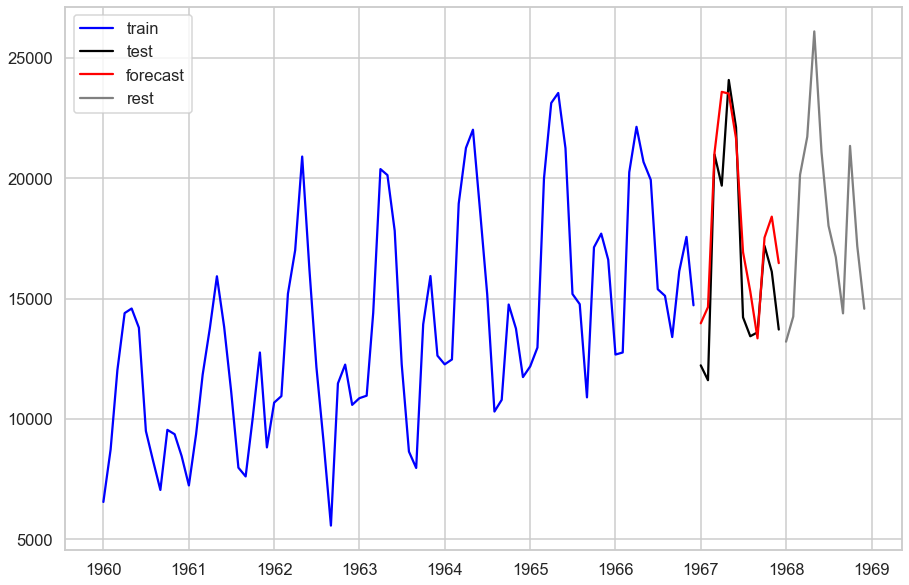

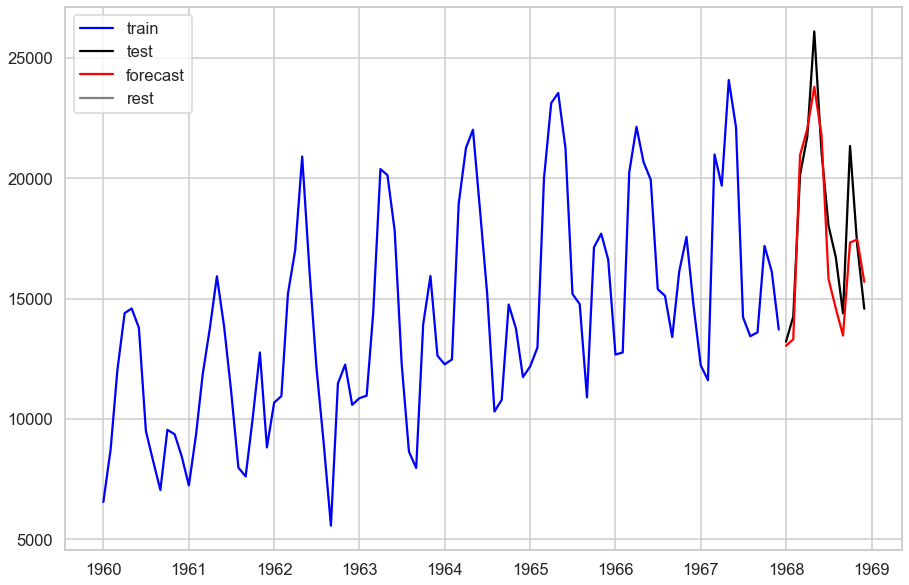

In [191]:
r2_list = list()
for i in reversed(range(n_splits)):
    idx = size - (i+1)*test_size
    train = s[0:idx]
    test = s[idx:idx+test_size]
    rest = s[idx+test_size:]
    mod = ExponentialSmoothing(train,trend='add',seasonal='add')
    mod_fit=mod.fit(optimized=True)
    

    predictions = mod_fit.forecast(len(test))
    
    fig, ax = plt.subplots()
    ax.plot(train, label='train', c = 'blue')
    ax.plot(test, label = 'test', c = 'black')
    ax.plot(predictions, label = 'forecast', c= 'red')
    ax.plot(rest, label = 'rest', c = 'grey')
    ax.legend()
    plt.show()
    r2_list.append(r2_score(test, predictions))
    
    

In [192]:
r2_list

[0.05992523321347243, 0.7313158578350002, 0.7910183335329316]